Dataset Runners, hiperlink: 
https://www.kaggle.com/datasets/beridzeg45/runners-dataset?resource=download

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"/workspaces/ML/RunnersClassification/Data/runners.csv")
df.head()

,Discipline,Gender,Runner,Time,Country,Date
0,100 metres,men,Usain Bolt,9.58,JAM,2009-08-16
1,100 metres,men,Usain Bolt,9.63,JAM,2012-08-05
2,100 metres,men,Usain Bolt,9.69,JAM,2008-08-16
3,100 metres,men,Tyson Gay,9.69,USA,2009-09-20
4,100 metres,men,Yohan Blake,9.69,JAM,2012-08-23


In [3]:
df.describe()

,Time
count,67949.000000
mean,445.359741
std,637.131364
min,9.580000
25%,44.850000
50%,118.580000
75%,462.990000
max,1929.990000


In [4]:
df.count()

Discipline    67949
Gender        67949
Runner        67949
Time          67949
Country       67949
Date          67560
dtype: int64

In [5]:
df.Discipline.unique()

array(['100 metres', '200 metres', '400 metres', '800 metres',
       '1500 metres', '3000 metres', '10000 metres'], dtype=object)

In [6]:
df.Gender.unique()

array(['men', 'women'], dtype=object)

In [7]:
df.Runner.unique()

array(['Usain Bolt', 'Tyson Gay', 'Yohan Blake', ..., 'Misaki Nishida',
       'Yuko Saito', 'Yoko Yagi'], shape=(8381,), dtype=object)

In [8]:
df.Country.unique()

array(['JAM', 'USA', 'KEN', 'Jacobs', 'TTO', 'RSA', 'CHN', 'GBR', 'CAN',
       'Fasuba', 'NAM', 'POR', 'FRA', 'NGR', 'BOT', 'BAR', 'ZIM',
       'Grasse', 'GHA', 'Oghenebrume', 'CUB', 'BAH', 'ANT', 'NED', 'QAT',
       'LBR', 'Harvey', 'Onwuzurike', 'AUS', 'AHO', 'SKN', 'Cissé',
       'Niekerk', 'Johnson', 'CAY', 'JPN', 'Meité', 'SRI', 'CMR', 'BRA',
       'Espinosa', 'ITA', 'Sani', 'TUR', 'OMA', 'COL', 'GAM', 'Zakari',
       'Ndure', 'GER', 'POL', 'CIV', 'IVB', 'Hua', 'PAN', 'da', 'de',
       'SUR', 'ZAM', 'BRN', 'Mohammed', 'IRI', 'Zohri', 'Nascimento',
       'DOM', 'PUR', 'GDR', 'ESP', 'THA', 'UGA', 'BEL', 'UKR', 'KOR',
       'dos', 'Kweku', 'KAZ', 'NOR', 'HUN', 'AZE', 'Barnes', 'SUI', 'NZL',
       'AUT', 'SWE', 'Wyk', 'Bangura', 'MAR', 'ECU', 'Fahmi', 'GUY',
       'GRE', 'Jerrel', 'Afrifah', 'MRI', 'CHI', 'AIA', 'Barros', 'SUD',
       'Herrera', 'Yaqoob', 'BUL', 'CRC', 'SEN', 'SWZ', 'RUS', 'Souza',
       'TPE', 'Sousa', 'Hillaire', 'TKS', 'Reid', 'MNT', 'Eugênio', 'St',
 

In [9]:
print(df.Date.unique())
"Maior Data:", df.Date.loc[df.Date.index.max()], "Menor Data:", df.Date.loc[df.Date.index.min()]

['2009-08-16' '2012-08-05' '2008-08-16' ... '2019-05-09' '2017-09-22'
 '1991-10-06']


('Maior Data:', '2019-07-25', 'Menor Data:', '2009-08-16')

Na corrida de 100 metros, qual o tempo minimo, maximo e médio dos atletas de cada categoria?

In [10]:
base_100m_men = df[(df.Gender == "men") & (df.Discipline == "100 metres")]
base_100m_women = df[(df.Gender == "women") & (df.Discipline == "100 metres")]

print(f" O tempo máximo para um atleta feminino percorrer 100 metros foi de : {base_100m_women.Time.max()}")
print(f" O tempo mínimo para um atleta feminino percorrer 100 metros foi de : {base_100m_women.Time.min()}")
print(f" O tempo médio para um atleta feminino percorrer 100 metros foi de : {base_100m_women.Time.median()}")
print("----------------------------------------------------------------------------------------------------")
print(f" O tempo máximo para um atleta masculino percorrer 100 metros foi de : {base_100m_men.Time.max()}")
print(f" O tempo mínimo para um atleta masculino percorrer 100 metros foi de : {base_100m_men.Time.min()}")
print(f" O tempo médio para um atleta masculino percorrer 100 metros foi de : {base_100m_men.Time.median()}")


 O tempo máximo para um atleta feminino percorrer 100 metros foi de : 11.09
 O tempo mínimo para um atleta feminino percorrer 100 metros foi de : 10.49
 O tempo médio para um atleta feminino percorrer 100 metros foi de : 11.01
----------------------------------------------------------------------------------------------------
 O tempo máximo para um atleta masculino percorrer 100 metros foi de : 10.09
 O tempo mínimo para um atleta masculino percorrer 100 metros foi de : 9.58
 O tempo médio para um atleta masculino percorrer 100 metros foi de : 10.03


Evolução do Bolt no decorrer de 10 anos
Plot linha (1 linha para cada velocidade), eixo X será as datas em que correu, eixo Y será o tempo gasto em cada prova

In [13]:
df.loc[df.Runner == "Usain Bolt"].Discipline.unique()

array(['100 metres', '200 metres'], dtype=object)

O runner Bolt só tem registros de 100 e 200 metros, então, nosso gráfico tera apenas 2 linhas.
Preparando a base para plot

In [15]:
base_bolt = df.loc[df.Runner == "Usain Bolt"]
base_bolt_100m = base_bolt.loc[base_bolt.Discipline	== "100 metres"]
base_bolt_100m_x = base_bolt_100m.Date
base_bolt_100m_y = base_bolt_100m.Time

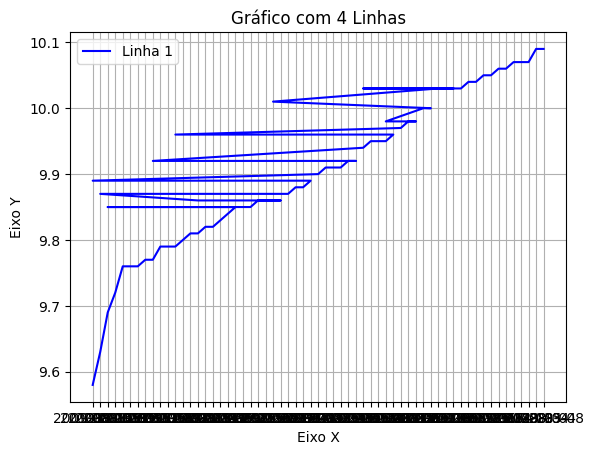

In [21]:
import matplotlib.pyplot as plt

# Criando o gráfico
plt.plot(base_bolt_100m_x, base_bolt_100m_y, label='Linha 1', color='blue')

# Adicionando rótulos e título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico com 4 Linhas')

plt.legend()

plt.grid(True)
plt.show()